In [1]:
import numpy as np
import plate_map as pm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from unidec_modules import unidectools as ud
from copy import deepcopy 
from unidec_modules.SeqChrom2 import *
import scipy
from copy import deepcopy
import copy

In [2]:
folders = ["D:\\161121 CTB ratios"]
map_paths = ["C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\reaction maps\\CTB ratio map.xlsx"]


In [3]:
def process_maps(self, groupby = 'Reaction'):

    

    # Reaction OR Substrate Conc

    self.pmap2 = self.pmap[self.pmap['Type'] != 'empty']
    self.pmap2.loc[:, 'Species'] = np.nan

    for skey, sval in self.speciesmap.groupby(['Reaction']):
        splist = [Species(spval.to_dict('records')[0], name = spkey) for spkey, spval in sval.groupby('Species')]
        splist = colorcodeclass(splist)

        for s in splist:
            self.pmap2.loc[:, s.__name__] = np.nan
            self.pmap2.loc[self.pmap2['Reaction']==skey, s.__name__] = self.pmap2.apply(lambda _:deepcopy(s), axis = 1)

        spnames = [s.__name__ for s in splist]
        self.pmap2.loc[self.pmap2['Reaction']==skey, 'Species'] = self.pmap2.apply(lambda _:spnames, axis = 1)

    # update_vars

    if len(self.data.spectra) == len(self.pmap2):
        for i, s in enumerate(self.data.spectra):
            well_id = self.pmap2.index[i]
            timevar = self.pmap2['Time'].iloc[i]
            s.attrs['Variable 1'] = well_id
            s.var1 = well_id
            s.attrs['Variable 2'] = timevar
            s.var2 = timevar
            self.pmap2.loc[well_id, 'Spectra'] = s



    spectra = {s.var1:s for s in self.data.spectra}

    # update species with well info/metadata 

    groupby = 'Reaction' # Reaction OR Substrate Conc

    for index, row in self.pmap2.iterrows():
        for specs in row['Species']:
            row[specs] = deepcopy(row[specs])
            row[specs].coord = row.name
    #         print(row[specs])
            vals = row[~row.index.isin(row['Species'])].to_dict()
            row[specs].__dict__.update(vals)
    return self
            

def peak_match(self, window = 10):
    window = 10

    intmat = np.array([])

    for index, row in self.pmap2.iterrows():

        rowints = np.array([])

        specieslist = list(row[row.index.isin(row['Species'])])
        theory_masses = np.array([sp.Mass for sp in specieslist])
        data_masses = np.array([p.mass for p in row['Spectra'].pks.peaks])
        pks = np.array([p for p in row['Spectra'].pks.peaks])

        # match algorithm 
        tm, dm = np.meshgrid(theory_masses, data_masses)
        diff = abs(tm - dm)
        diff[diff>window] = np.nan
        for i, d in enumerate(diff):
            if np.isnan(d).all()==False:
                minimum = np.nanargmin(d)
                data_peak = data_masses[i]

                specieslist[minimum].peak = pks[i]
                specieslist[minimum].integral = pks[i].integral[0]
                print("{}, {} = {}".format(row[row.index.isin(row['Species'])][minimum].__name__, data_peak, pks[i]))

                row[row.index.isin(row['Species'])][minimum].integral = pks[i].integral[0]
                row[row.index.isin(row['Species'])][minimum].peak = pks[i]
                np.append(rowints, pks[i].integral[0])
                print(row[row.index.isin(row['Species'])][minimum].integral)

    return self


In [4]:
def normalise_peaks(self):
    for index, row in self.pmap2.iterrows():
        ints = []
        for s in row[row['Species']]:
            if type(s.integral) != list:
                ints.append(s.integral)

    #     ints = np.array([s.integral for s in row[row['Species']]])
        sum_ints = np.sum(ints)
        for s in row[row['Species']]:
            if type(s.integral) != list:
                s.percentage = s.integral/sum_ints
            else:
                s.percentage = 0
            print("{}:{}".format(s.__name__, s.percentage))
            
    return self



UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Opening HDF5 File: D:\161121 CTB ratios\211111 ctb ratio v2_336087_GA7_01_80179.d.hdf5
Reading mzML: D:\161121 CTB ratios\211111 ctb ratio v2_336087_GA7_01_80179.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\161121 CTB ratios\211111 ctb ratio v2_336087_GA7_01_80179.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
loaded D:\161121 CTB ratios\211111 ctb ratio v2_336087_GA7_01_80179.d.mzML

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Opening HDF5 File: D:\161121 CTB ratios\211112 CTB ratio E2_336220_RB7_01_80231.d.hdf5
Reading 

C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Bad Peak [0.418317   0.79750116] 0.19986600000000004 [0.418317, 0.618183]
Bad Peak [0.718367   0.22831547] 0.32913299999999995 [0.418317, 0.74745]
0.980167 0.14125
1.91928 0.1537400000000002
2.85447 0.1454500000000003
3.7897 0.16620999999999997
4.72898 0.15376000000000012
5.86363 0.06648000000000032
Getting scans: [310, 347]
Length merge axis: 38888
Getting scans: [536, 571]
Length merge axis: 38600
Getting scans: [761, 801]
Length merge axis: 38236
Getting scans: [986, 1023]
Length merge axis: 38725
Execution Time: 0.11710270000000378
Execution Time: 5.535568800000007
Execution Time: 0.22480009999999595
Peak info saved to: D:\161121 CTB ratios\UniDec_Figures_and_Files\211112 CTB ratio E2_336220_RB7_01_80231.d_extracts.txt
D:\161121 CTB ratios\211112 CTB ratio E2_336220_RB7_01_80231.d.mzML failed
1305 2
Noise Level: 0.04241734680242584 Window: 0.05
Bad Peak [0.418467   0.79264942] 0.23921600000000004 [0.418467, 0.657683]
Bad Peak [0.585033   0.61379151] 0.24338300000000007 [0.418467, 0

C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Getting scans: [131, 169]
Length merge axis: 37850
Getting scans: [356, 397]
Length merge axis: 38910
Getting scans: [582, 618]
Length merge axis: 38473
Getting scans: [807, 844]
Length merge axis: 38812
Getting scans: [1032, 1071]
Length merge axis: 38319
Execution Time: 0.08346889999999973
Execution Time: 6.732198299999993
Execution Time: 0.23551630000000046
Peak info saved to: D:\161121 CTB ratios\UniDec_Figures_and_Files\211115 CTB ratio E2_336324_BA4_01_80260.d_extracts.txt
CTB-E9-H6, 14751.0 = <unidec_modules.peakstructure.Peak object at 0x00000241AC260160>
513110.3
CTB-H6, 13596.0 = <unidec_modules.peakstructure.Peak object at 0x00000241AC2C91C0>
893021.5
CTB-E9-H6, 14758.0 = <unidec_modules.peakstructure.Peak object at 0x00000241AC2C9310>
2274207.8
CTB-H6, 13596.0 = <unidec_modules.peakstructure.Peak object at 0x00000241AC2DF880>
3918798.0
CTB-E9-H6, 14757.0 = <unidec_modules.peakstructure.Peak object at 0x00000241AC2DF9D0>
3303333.0
CTB-H6, 13596.0 = <unidec_modules.peakstruct

C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\cm19ljc\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

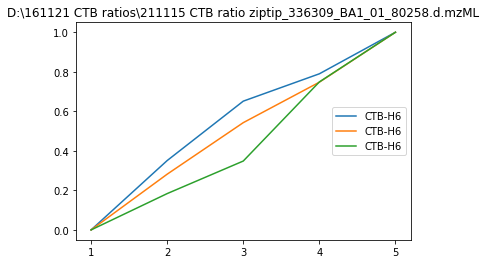

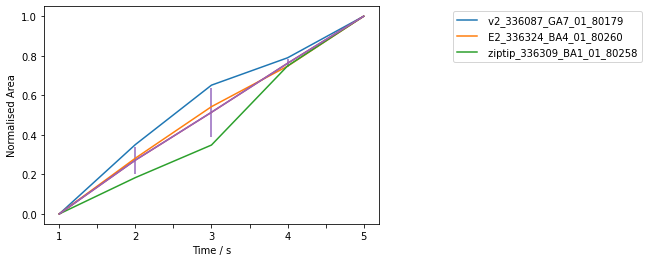

In [5]:
data_df2_list = []

for i, folder in enumerate(folders): 
    filenames = os.listdir(folder)
    engines = []
    for dname, dirs, files in os.walk(folder):

        for fname in files:

            if fname[-4:] == "mzML":
                eng = SeqChrom()

                spectra_path = os.path.join(dname, fname)
                eng.load_mzml(spectra_path)
                print("loaded {}".format(spectra_path))
                engines.append(eng)
                
    plt.figure()
    df1 = pd.DataFrame()
    dflist = []
    for eng in engines:
        try:
            eng.config.chrom_peak_width = 0.05 
            eng.get_chrom_peaks(lb = 1, ub = 5.5) 
            eng.add_chrom_peaks2() 
    #         eng.plot_tic(peak_windows = True)
            eng.update_config(masslb = 10000, massub = 20000, minmz = 500, peakthresh = 0.1)
            eng.process_data()
            eng.run_unidec()
            eng.pick_peaks()
            eng.integrate_all()
    #         eng.plot_all(dtype = 'massdat', combine = True, cmap = 'viridis', xlim = [41000, 43000])
            rmap = eng.upload_map(map_paths[i])
            species, wells = eng.upload_map(map_paths[i])
            eng = process_maps(eng)
            eng = peak_match(eng)
            eng = normalise_peaks(eng)
            self = eng
            # get data

            species = None
            datatype = 'percentage'
            rxndct = {}
            groupby = 'Reaction'

            # def extract_data(self):

            rxns_tc = []
            for k, v in self.pmap2.groupby(groupby):

                time = v['Time']
                speciesdct = {}
                speciestimedct = {}

                for index, row in v.iterrows():
                    if species == None:
                        species = row.Species

                    if len(species) == 1:
                        species = [species]

                    for s in species:
                        if s in speciesdct:
                            speciesdct[s].append(getattr(row[s], datatype))
                            speciestimedct[s].append(row['Time'])

                        else:
                            speciesdct[s] = [getattr(row[s], datatype)]
                            speciestimedct[s] = [row['Time']]
                df = pd.DataFrame(speciesdct, index = time)
                rxns_tc.append(df)

            if len(rxns_tc) == 1:
                rxns_tc = rxns_tc[0]

            for name, y in speciesdct.items():
    #             plt.figure()
                if name == "CTB-H6":
                    plt.plot(time, y, label = name)
                    plt.legend(loc = "center right")
                    plt.title(eng.path)



            rxndct[k] = pd.DataFrame(speciesdct, index = time)
            rxndct[k].loc[:, 'Path'] = eng.path
            rxndct[k].loc[:, 'Reaction'] = k
            dflist.append(rxndct[k])
            # ---------------------------------------------------------------------------
            self.datadct = rxndct
        except Exception: 
            print("{} failed".format(eng.path))
    plt.show()
    
    
    data_df = pd.concat(dflist)
    
    
    
    key_species = "CTB-H6"
    l = []
    n = np.array([])
    for name, df in data_df.groupby(['Path', 'Reaction']):

        df[key_species].plot(label = str(name[0][37:-7]))
        plt.legend(loc = 'upper right', bbox_to_anchor=(1.8, 1))
        l.append(np.array(df[key_species]))
    arr = np.array(l)

    yg = arr[:, 2] - arr[:, 0]
    t = data_df.index.unique()
    xg = float(t[2]) -float(t[0])
    g = yg/xg

    # delete negative gradients 
    arr = arr[g>0, :]
    std = np.std(arr, axis = 0)
    mean = np.mean(arr, axis = 0)
    plt.plot(t, mean)
    plt.errorbar(t, mean, std)
    plt.xlabel('Time / s')
    plt.ylabel('Normalised Area')
    plt.show()
    
    data_df.loc[:, 'Cat conc'] = folder
    data_df2_list.append(data_df)

In [6]:
datadf2 = pd.concat(data_df2_list)
datadf2


,CTB-E9-H6,CTB-H6,Path,Reaction,Cat conc
Time,,,,,
1,1.000000,0.000000,D:\161121 CTB ratios\211111 ctb ratio v2_33608...,ctb_mix,D:\161121 CTB ratios
2,0.649141,0.350859,D:\161121 CTB ratios\211111 ctb ratio v2_33608...,ctb_mix,D:\161121 CTB ratios
3,0.348603,0.651397,D:\161121 CTB ratios\211111 ctb ratio v2_33608...,ctb_mix,D:\161121 CTB ratios
4,0.210228,0.789772,D:\161121 CTB ratios\211111 ctb ratio v2_33608...,ctb_mix,D:\161121 CTB ratios
5,0.000000,1.000000,D:\161121 CTB ratios\211111 ctb ratio v2_33608...,ctb_mix,D:\161121 CTB ratios
1,1.000000,0.000000,D:\161121 CTB ratios\211115 CTB ratio E2_33632...,ctb_mix,D:\161121 CTB ratios
2,0.718043,0.281957,D:\161121 CTB ratios\211115 CTB ratio E2_33632...,ctb_mix,D:\161121 CTB ratios
3,0.457390,0.542610,D:\161121 CTB ratios\211115 CTB ratio E2_33632...,ctb_mix,D:\161121 CTB ratios
4,0.252601,0.747399,D:\161121 CTB ratios\211115 CTB ratio E2_33632...,ctb_mix,D:\161121 CTB ratios


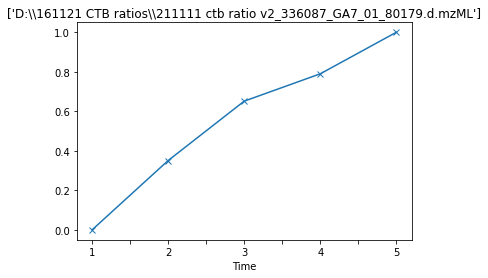

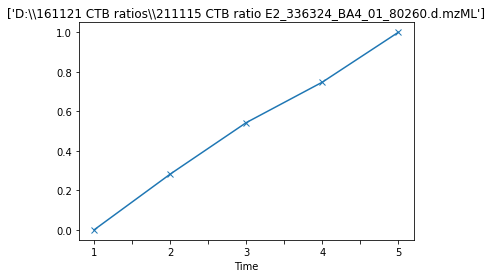

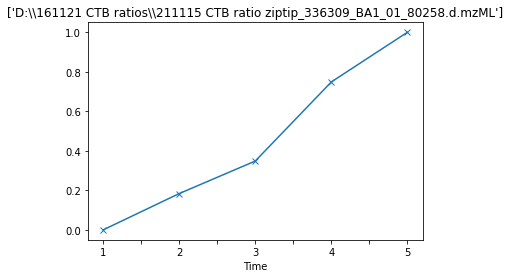

In [7]:
for name, d in datadf2.groupby(['Path']):
    d[key_species].plot(marker = 'x')
    plt.title(d.Path.unique())
    plt.show()

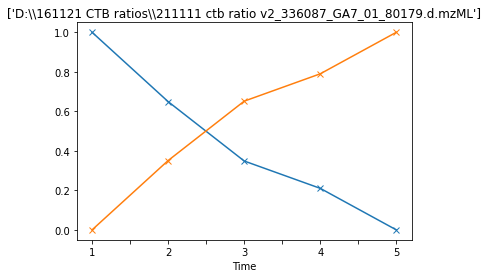

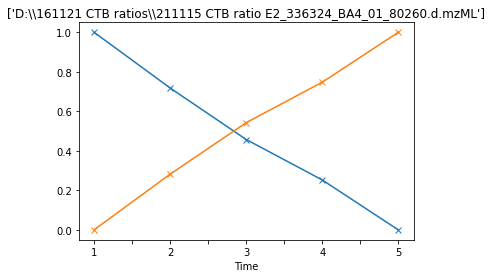

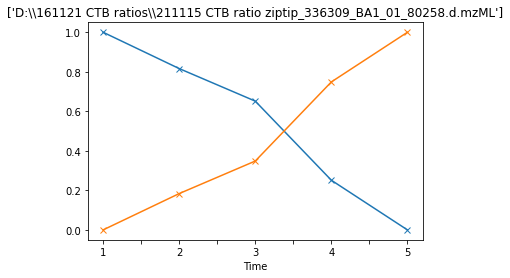

In [33]:
cols = ['Path', 'Reaction', 'Cat conc']
species = list(datadf2[datadf2.columns[~datadf2.columns.isin(cols)]].columns)


for name, d in datadf2.groupby(['Path']):
    plt.figure()
    for key_species in species:
        d[key_species].plot(marker = 'x')
        plt.title(d.Path.unique())
    plt.show()

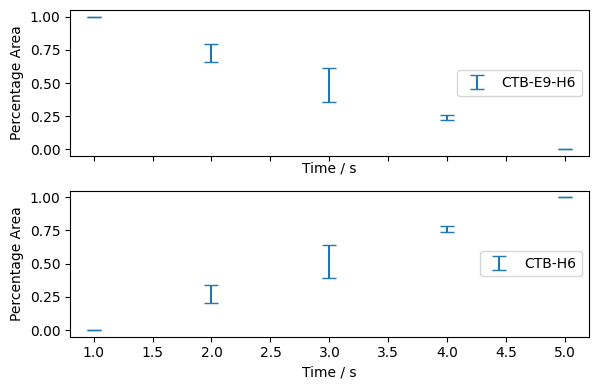

In [91]:
means = datadf2.reset_index().groupby('Time').mean()

fig, ax = plt.subplots(2, 1, sharex = True, dpi = 100)
# for name, d in datadf2.groupby(['Path']):
for i, key_species in enumerate(species):
        

    arr = np.array([np.array(d[key_species]) for name, d in datadf2.reset_index().groupby('Time')])
    means = means.sort_values(by ='Time')
    means.index = means.index.astype(float)
    t = means.index.unique()
    std = np.std(arr, axis = 1)

    
    
    ax[i].errorbar(t, means[key_species], std, label = key_species, capsize = 5, fmt = 'none')
    ax[i].set_xlabel('Time / s')
    ax[i].set_ylabel('Percentage Area')
#     means[key_species].plot(legend = key_species, marker = 'x')
    ax[i].legend(loc = 'center right')
#     ax[i].grid(True)
fig.tight_layout()
plt.show()


In [9]:
l = np.array([np.array(x[key_species]) for name, x in df.groupby('Time')])

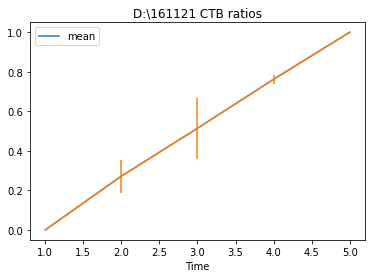

In [10]:
# des_df = datadf2.reset_index().groupby(['Cat conc', 'Time']).describe()#.reset_index()
# for name, dfs in des_df[key_species].groupby(['Cat conc']):
    
#     dfs = dfs.reset_index()
#     dfs['Time'] = dfs['Time'].astype(float)
#     dfs = dfs.sort_values(by = 'Time').reset_index(drop = True)
#     dfs.plot(x = 'Time', y = 'mean')
#     plt.errorbar(dfs['Time'], dfs['mean'], dfs['std'])
#     plt.title(name)
# plt.show()

In [11]:
# for n, d in datadf2.reset_index().groupby(['Cat conc', 'Time']):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-11-4bef307123be>, line 2)

In [13]:
thresh = 5
dflist = []
for n, d in datadf2.reset_index().groupby(['Cat conc', 'Time']):
    timepoints = np.array(d[key_species])
    # discount anomolies (speak to supervisors about this/other method)
    l = np.array([y for y in timepoints if y < (timepoints*thresh).all()])
    
    newdf = pd.DataFrame(l, columns = [key_species])
#     newdf = pd.DataFrame([ser])

    newdf['Cat conc'] = n[0]
    newdf['Time'] = n[1]
    
    dflist.append(newdf)
ks_df = pd.concat(dflist)

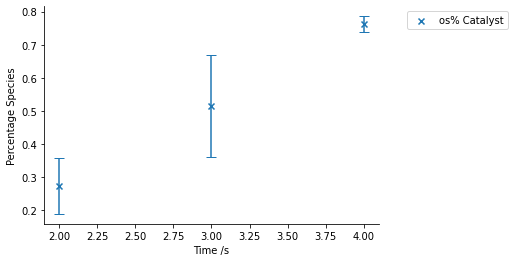

In [14]:
des_df = ks_df.reset_index().groupby(['Cat conc', 'Time']).describe()#.reset_index()

fig, ax = plt.subplots()
for name, dfs in des_df[key_species].groupby(['Cat conc']):
    
    dfs = dfs.reset_index()
    dfs['Time'] = dfs['Time'].astype(float)
    dfs = dfs.sort_values(by = 'Time').reset_index(drop = True)
#     dfs.plot(x = 'Time', y = 'mean')
    ax.errorbar(dfs['Time'], dfs['mean'], dfs['std'], capsize = 5, fmt = 'none')
    l = name[-2:] + "% Catalyst"
    ax.scatter(dfs['Time'], dfs['mean'], label = l, marker = 'x')
    ax.legend(bbox_to_anchor = (1.4, 1), loc = "upper right")
    ax.set_xlabel('Time /s')
    ax.set_ylabel('Percentage Species')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()